In [1]:
import suiteorbits as so
import numpy as np
import matplotlib.pyplot as plt
from galpy.potential import NFWPotential, DehnenBarPotential

In [2]:
nfw_pot = NFWPotential()
bar_pot = DehnenBarPotential(Af=0.01, rb=1, omegab=1,)
pot = nfw_pot + bar_pot

n_orbits = 100
E_range = [-0.4, -0.25]
E_list = np.linspace(E_range[0], E_range[1], n_orbits)
Lz = nfw_pot.LcE(E_list[0])

In [3]:
suite = so.Suite(E=E_range, Lz=float(Lz), dim_res=n_orbits, pot=pot, integ_time={'t_start':0, 't_end':100, 'steps':10000})

Initializing orbits...
Integrating orbits...


Text(0, 0.5, '$E$')

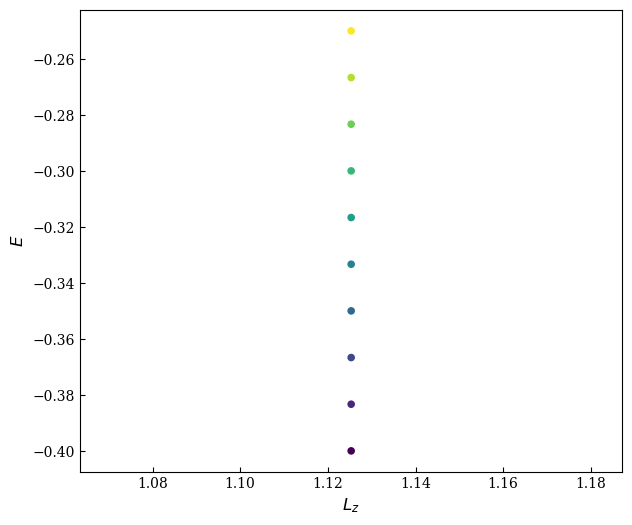

In [9]:
suite.plot('Lz', 'E', style='scatter', s=20, fig_kwargs={'figsize':(7, 6)}, time_inds=[0], orb_inds=np.linspace(0, n_orbits-1, 10, dtype=int))
plt.xlabel(r'$L_z$')
plt.ylabel(r'$E$')

Text(0, 0.5, 'y')

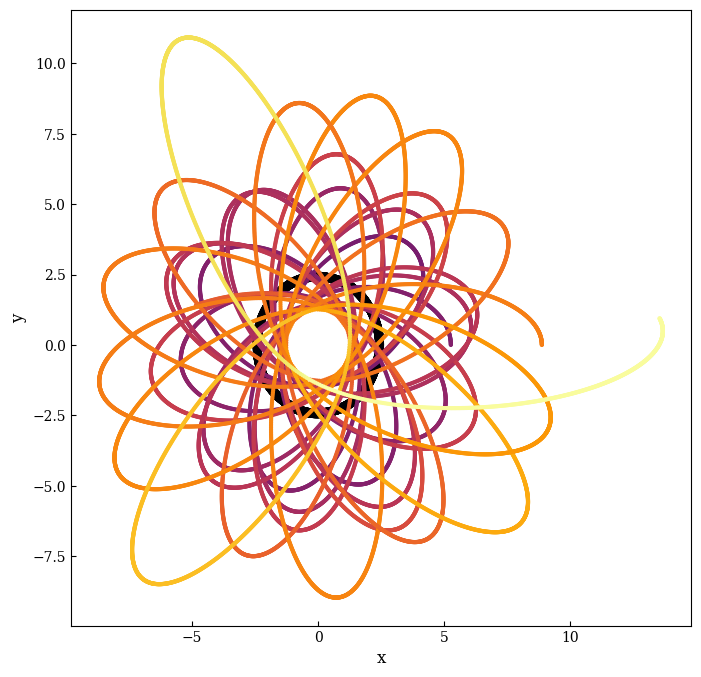

In [82]:
suite.plot('x', 'y', color_by='E',  cmap='inferno', style='scatter',s=4, fig_kwargs={'figsize':(8,8)}, orb_inds=np.linspace(0, n_orbits-1, 3).astype(int))
plt.xlabel('x')
plt.ylabel('y')

Text(0, 0.5, '$v_r$')

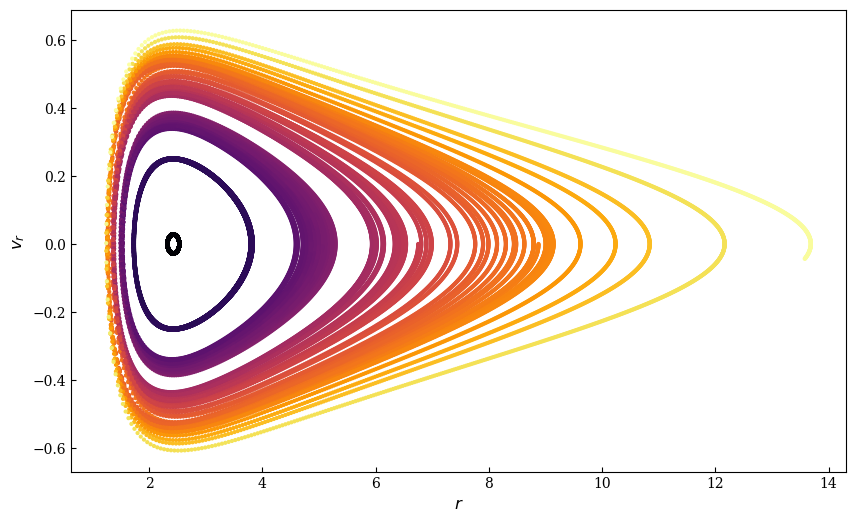

In [67]:
suite.plot('r', 'vr', color_by='E', cmap='inferno', style='scatter', s=4, orb_inds=np.linspace(0, n_orbits-1, 5).astype(int))
plt.xlabel('$r$')
plt.ylabel('$v_r$')

Text(0, 0.5, 'r')

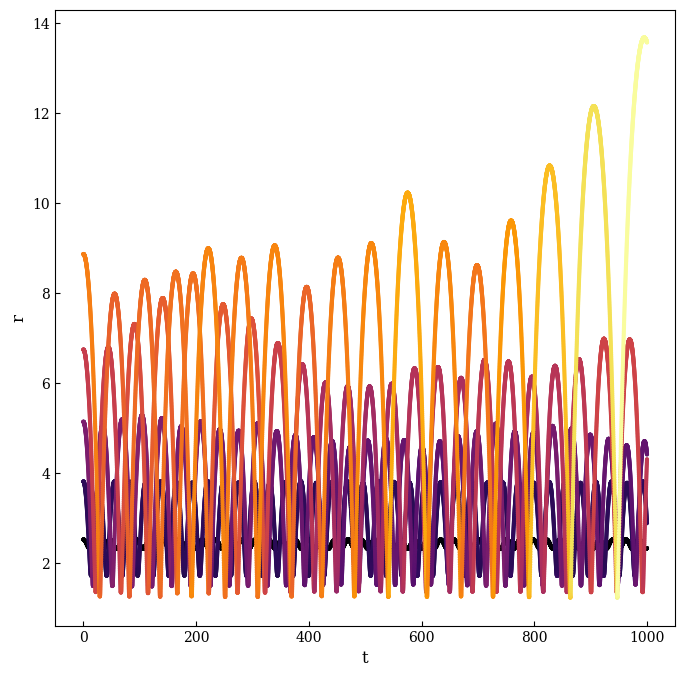

In [68]:
suite.plot('t', 'r', color_by='E',  cmap='inferno', style='scatter',s=4, fig_kwargs={'figsize':(8,8)}, orb_inds=np.linspace(0, n_orbits-1, 5).astype(int))
plt.xlabel('t')
plt.ylabel('r')

In [4]:
deltaE = suite.deltaValue('E')

<>:4: SyntaxWarning: invalid escape sequence '\D'

<>:4: SyntaxWarning: invalid escape sequence '\D'

/tmp/ipykernel_420237/411900830.py:4: SyntaxWarning: invalid escape sequence '\D'
  ax.set_ylabel('$\Delta E$')



Text(0, 0.5, '$\\Delta E$')

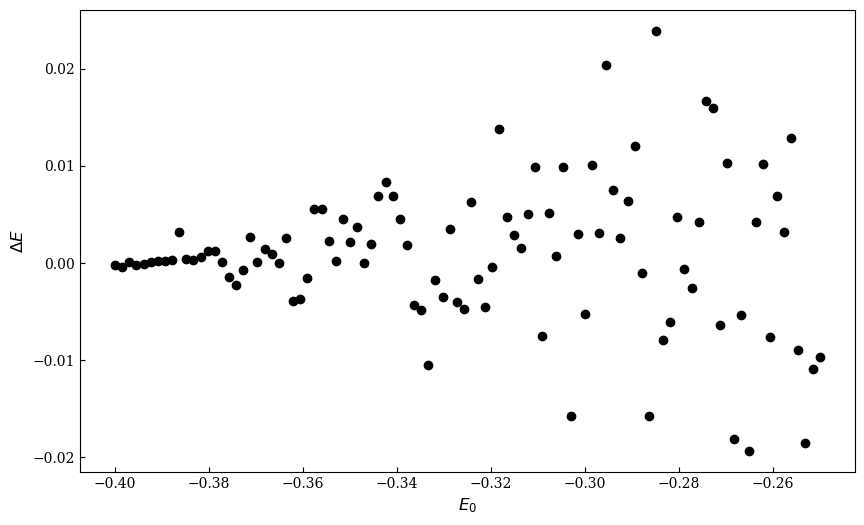

In [20]:
fig, ax = plt.subplots()
ax.scatter(suite.orbits.E(suite.ts[0]), deltaE, c='k')
ax.set_xlabel('$E_0$')
ax.set_ylabel('$\Delta E$')
# Create a secondary x-axis for orbit indices
# secax = ax.secondary_xaxis('top', functions=(
#     lambda e: suite.orbits.rap()[np.abs(suite.orbits.E(suite.ts[0]) - e).argmin()] / suite.orbits.rperi()[np.abs(suite.orbits.E(suite.ts[0]) - e).argmin()],
#     lambda ratio: suite.orbits.E(suite.ts[0])[np.abs(suite.orbits.rap() / suite.orbits.rperi() - ratio).argmin()]
# ))
# secax.set_xlabel('Orbit Index')
# secax.set_xticks(np.linspace(0, n_orbits-1, 5, dtype=int))

<>:4: SyntaxWarning: invalid escape sequence '\D'

<>:4: SyntaxWarning: invalid escape sequence '\D'

/tmp/ipykernel_420237/3499565961.py:4: SyntaxWarning: invalid escape sequence '\D'
  ax.set_ylabel('$\Delta E$')



Text(0, 0.5, '$\\Delta E$')

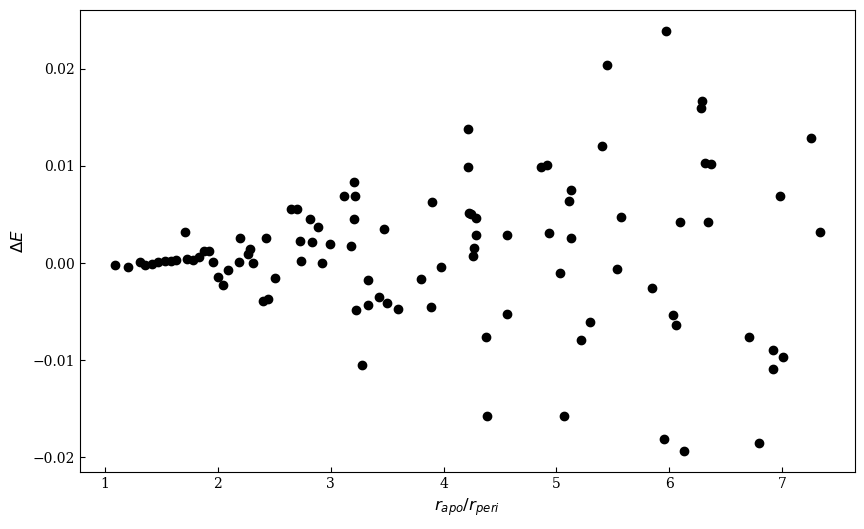

In [25]:
fig, ax = plt.subplots()
ax.scatter(suite.orbits.rap()/suite.orbits.rperi(), deltaE, c='k')
ax.set_xlabel('$r_{apo} / r_{peri}$')
ax.set_ylabel('$\Delta E$')

<>:4: SyntaxWarning: invalid escape sequence '\D'

<>:4: SyntaxWarning: invalid escape sequence '\D'

/tmp/ipykernel_420237/346968132.py:4: SyntaxWarning: invalid escape sequence '\D'
  ax.set_ylabel('$\Delta E$')



Text(0, 0.5, '$\\Delta E$')

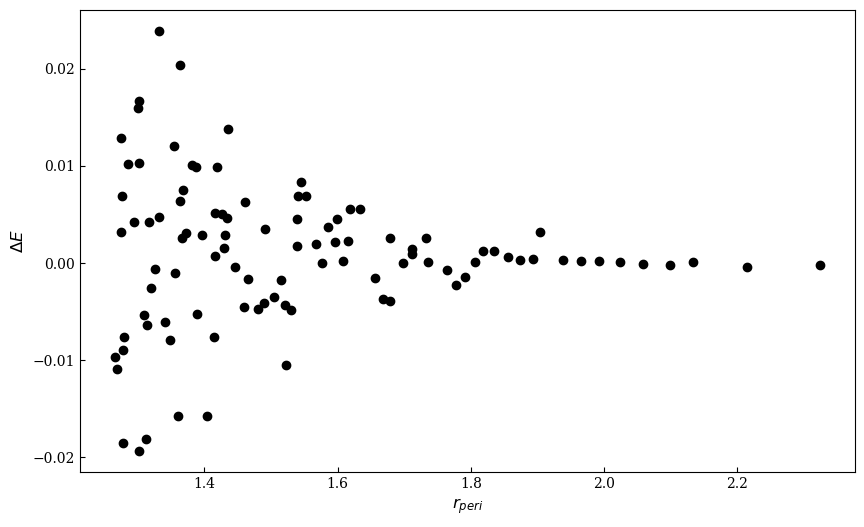

In [27]:
fig, ax = plt.subplots()
ax.scatter(suite.orbits.rperi(), deltaE, c='k')
ax.set_xlabel('$r_{peri}$')
ax.set_ylabel('$\Delta E$')

Text(0, 0.5, 'Counts')

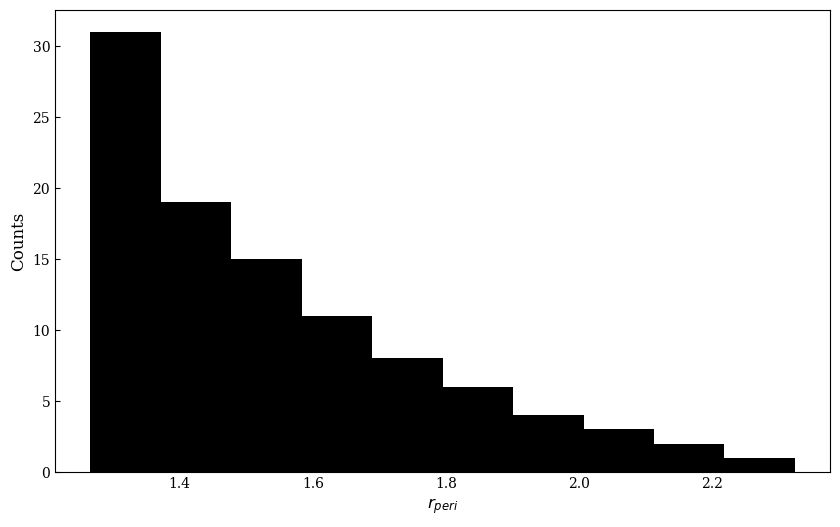

In [34]:
plt.hist(suite.orbits.rperi(0), bins=10, color='k')
plt.xlabel('$r_{peri}$')
plt.ylabel('Counts')

<>:4: SyntaxWarning: invalid escape sequence '\D'

<>:4: SyntaxWarning: invalid escape sequence '\D'

/tmp/ipykernel_420237/599289824.py:4: SyntaxWarning: invalid escape sequence '\D'
  ax.set_ylabel('$\Delta E$')



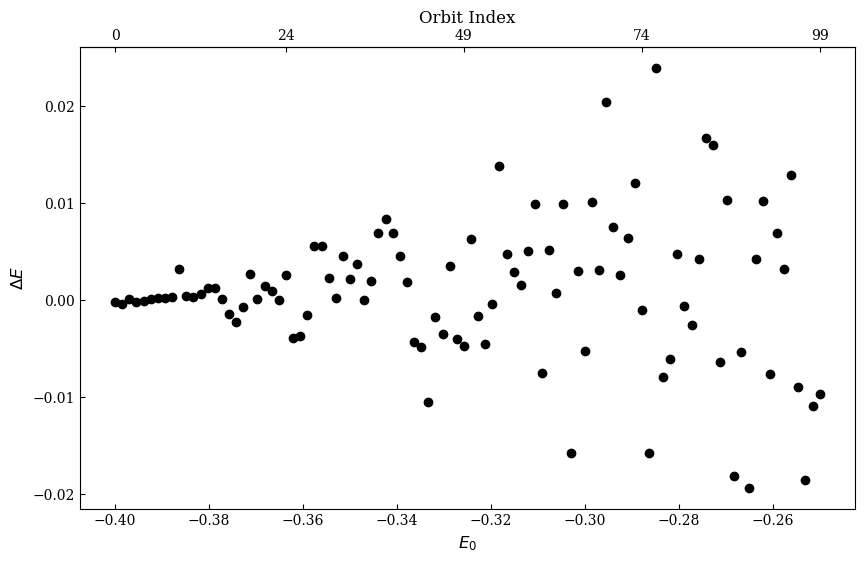

In [ ]:
fig, ax = plt.subplots()
ax.scatter(suite.orbits.E(suite.ts[0]), deltaE, c='k')
ax.set_xlabel('$E_0$')
ax.set_ylabel('$\Delta E$')
# Create a secondary x-axis for orbit indices
secax = ax.secondary_xaxis('top', functions=(
    lambda e: (e - E_range[0]) / (E_range[1] - E_range[0]) * (n_orbits - 1),
    lambda idx: E_range[0] + idx * (E_range[1] - E_range[0]) / (n_orbits - 1)
))
secax.set_xlabel('Orbit Index')
secax.set_xticks(np.linspace(0, n_orbits-1, 5, dtype=int))

In [94]:
suite.orbits

In [93]:
suite.orbits.E(suite.ts)

KeyboardInterrupt: 

In [ ]:
np.ptp(suite.orbits.E(ts))

In [88]:
plt.plot(suite.orbits.E(suite.ts[0]), suite.deltaValue('E'), c='k')

KeyboardInterrupt: 

In [ ]:
# ADD to plotting routine!
# 
# #suite.plot('E', suite.deltaValue('E'))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

Text(0, 0.5, '$E$')

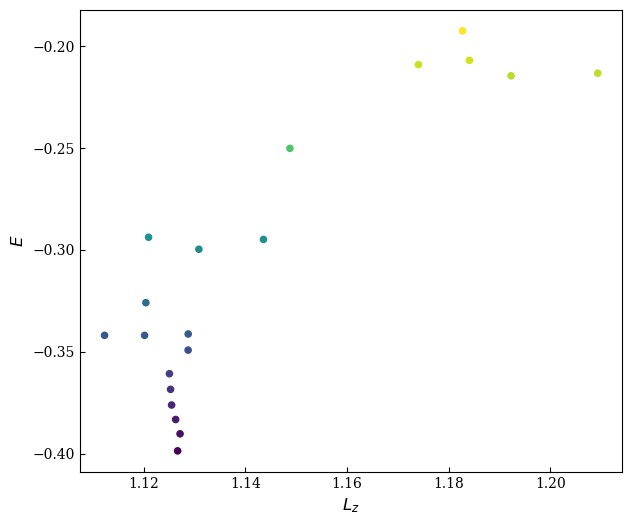

In [69]:
suite.plot('Lz', 'E', style='scatter', s=20, fig_kwargs={'figsize':(7, 6)}, time_inds=[-1])
plt.xlabel(r'$L_z$')
plt.ylabel(r'$E$')

# Now plot only a subset of the orbits

Text(0, 0.5, 'y')

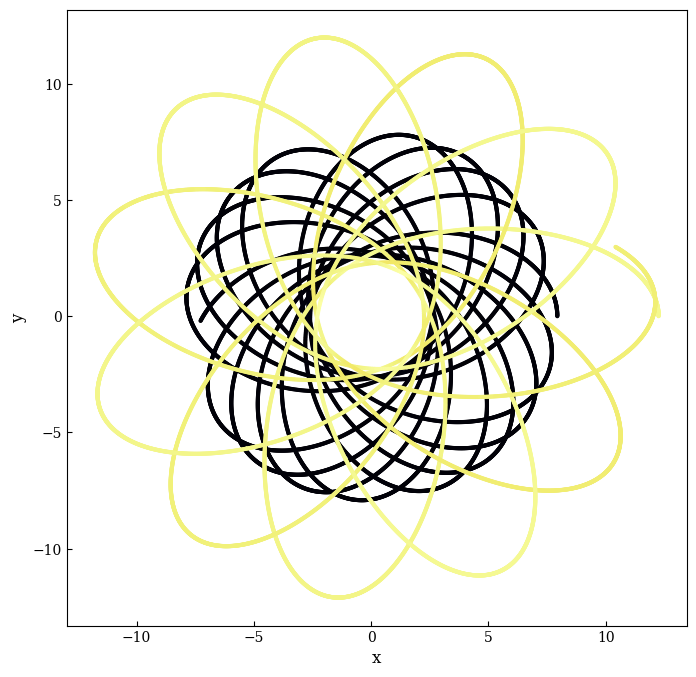

In [34]:
orb_inds = [2, -1]
suite.plot('x', 'y', color_by='E', orb_inds=orb_inds, cmap='inferno', style='scatter',s=4, fig_kwargs={'figsize':(8,8)})
plt.xlabel('x')
plt.ylabel('y')

Text(0, 0.5, 'r')

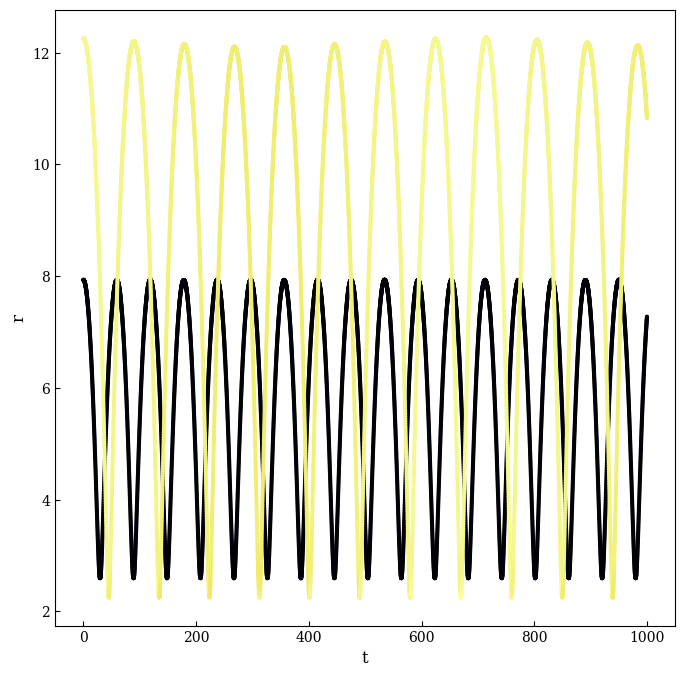

In [35]:
suite.plot('t', 'r', color_by='E', orb_inds=orb_inds, cmap='inferno', style='scatter',s=4, fig_kwargs={'figsize':(8,8)})
plt.xlabel('t')
plt.ylabel('r')

# Plot only a subset of the times


/geir_data/scr/gabrielspace/miniforge3/envs/ML_Dyn/lib/python3.12/site-packages/suiteorbits/suite/suite.py:176: UserWarning: A color is provided yet color_by is not None. The color provided will be used.
  warnings.warn('A color is provided yet color_by is not None. The color provided will be used.')



Text(0, 0.5, 'y')

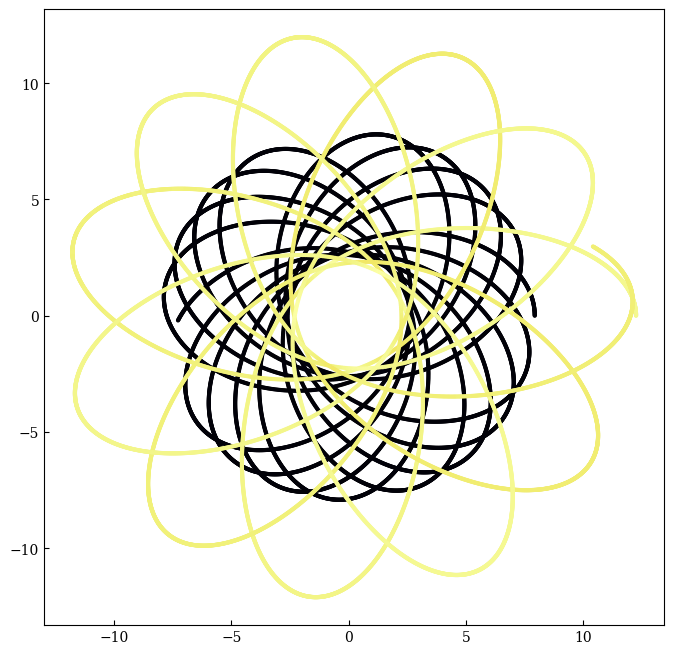

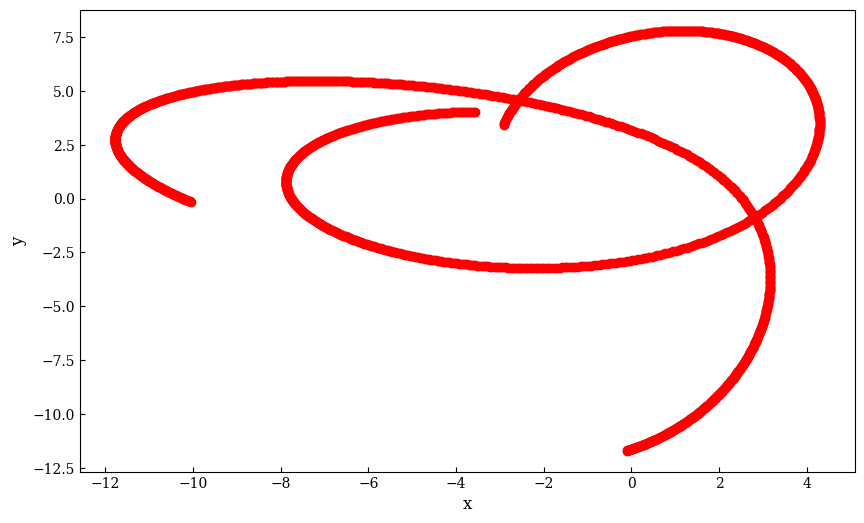

In [36]:
orb_inds = [2, -1]
time_inds = np.arange(1000,2000, 1)
suite.plot('x', 'y', color_by='E', orb_inds=orb_inds, cmap='inferno', style='scatter',s=4, fig_kwargs={'figsize':(8,8)})
suite.plot('x', 'y', orb_inds=orb_inds, color_by=None, c='r', style='scatter', time_inds=time_inds) # figure out how to overlay plots...
plt.xlabel('x')
plt.ylabel('y')

In [37]:
suite.ts

array([0.00000000e+00, 1.00010001e-01, 2.00020002e-01, ...,
       9.99799980e+02, 9.99899990e+02, 1.00000000e+03], shape=(10000,))

In [38]:
suite.orbits._parse_plot_quantity('x')[orb_inds][:,time_inds]

array([[ -3.55652276,  -3.59983   ,  -3.64290686, ...,  -2.89430728,
         -2.90529643,  -2.91600682],
       [ -0.10912421,  -0.09357727,  -0.07802938, ..., -10.09424456,
        -10.07327943, -10.05216699]], shape=(2, 1000))